Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


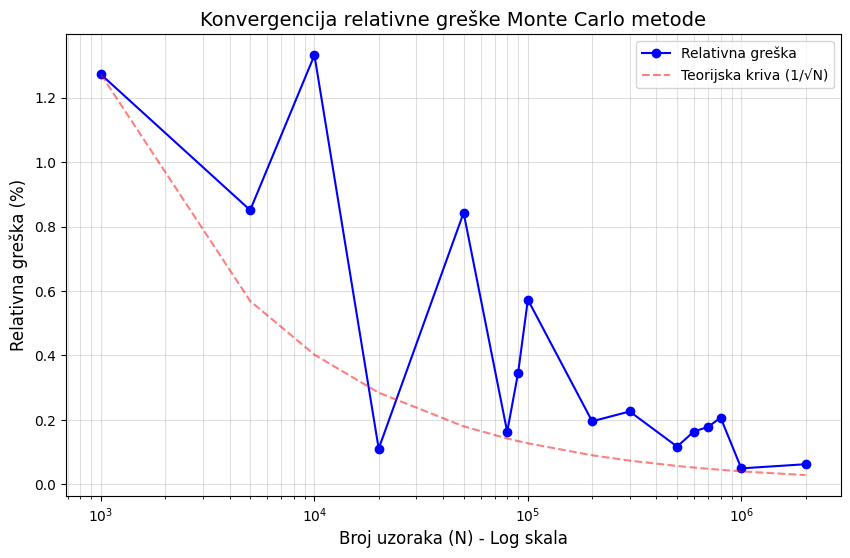

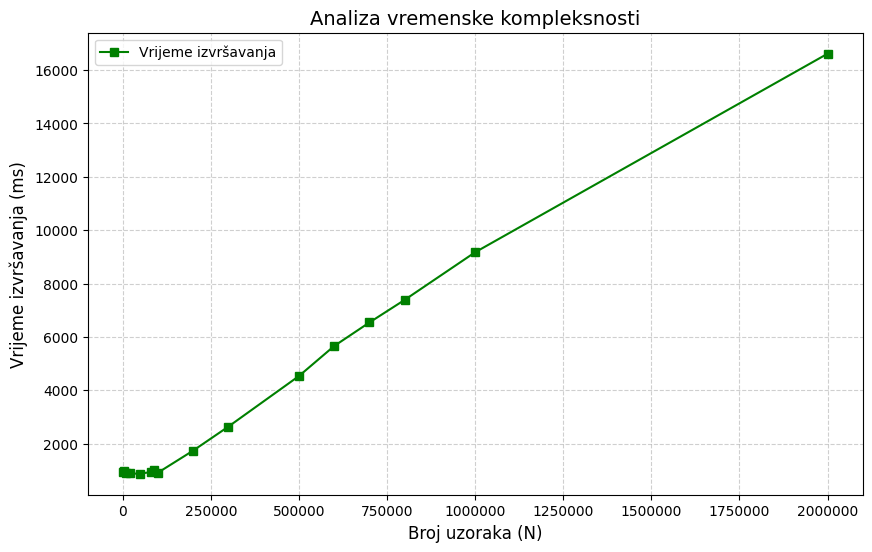

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# Učitaj dataset
df = pd.read_csv('/content/drive/MyDrive/NASP projekat/monte_carlo_results.csv')

# ---------------------------------------------------------
# GRAFIK 1: Konvergencija greške (Log skala)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

# Crtanje linije greške
plt.plot(df['N'], df['RelError_Percent'], marker='o', linestyle='-', color='blue', label='Relativna greška')

# Dodavanje teorijske krive 1/sqrt(N) radi poređenja (skalirano)
# Ovo je opcionalno, ali izgleda jako dobro u naučnom radu
k = df['RelError_Percent'].iloc[0] * np.sqrt(df['N'].iloc[0]) # Konstanta skaliranja
theoretical_error = k / np.sqrt(df['N'])
plt.plot(df['N'], theoretical_error, linestyle='--', color='red', alpha=0.5, label='Teorijska kriva (1/√N)')

plt.xscale('log') # Logaritamska skala za N jer ide od 1k do 2M
plt.title('Konvergencija relativne greške Monte Carlo metode', fontsize=14)
plt.xlabel('Broj uzoraka (N) - Log skala', fontsize=12)
plt.ylabel('Relativna greška (%)', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.4)
plt.legend()

# Čuvanje grafika
plt.savefig('grafik_konvergencije.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------------------------------------------
# GRAFIK 2: Vrijeme izvršavanja (Linearna kompleksnost)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

plt.plot(df['N'], df['Time_ms'], marker='s', linestyle='-', color='green', label='Vrijeme izvršavanja')

plt.title('Analiza vremenske kompleksnosti', fontsize=14)
plt.xlabel('Broj uzoraka (N)', fontsize=12)
plt.ylabel('Vrijeme izvršavanja (ms)', fontsize=12)
plt.grid(True, ls="--", alpha=0.6)
plt.legend()

# Formatiranje x-ose da ne koristi naučnu notaciju (npr. 1e6)
plt.ticklabel_format(style='plain', axis='x')

# Čuvanje grafika
plt.savefig('grafik_vremena.png', dpi=300, bbox_inches='tight')
plt.show()